# Importing libraries

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno

from statistics import stdev
from scipy.stats import t

import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [5]:
data = pd.read_csv(r'C:\Users\admin\Downloads\QVI_data.csv')

In [7]:
data.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget


In [8]:
data.shape

(264834, 12)

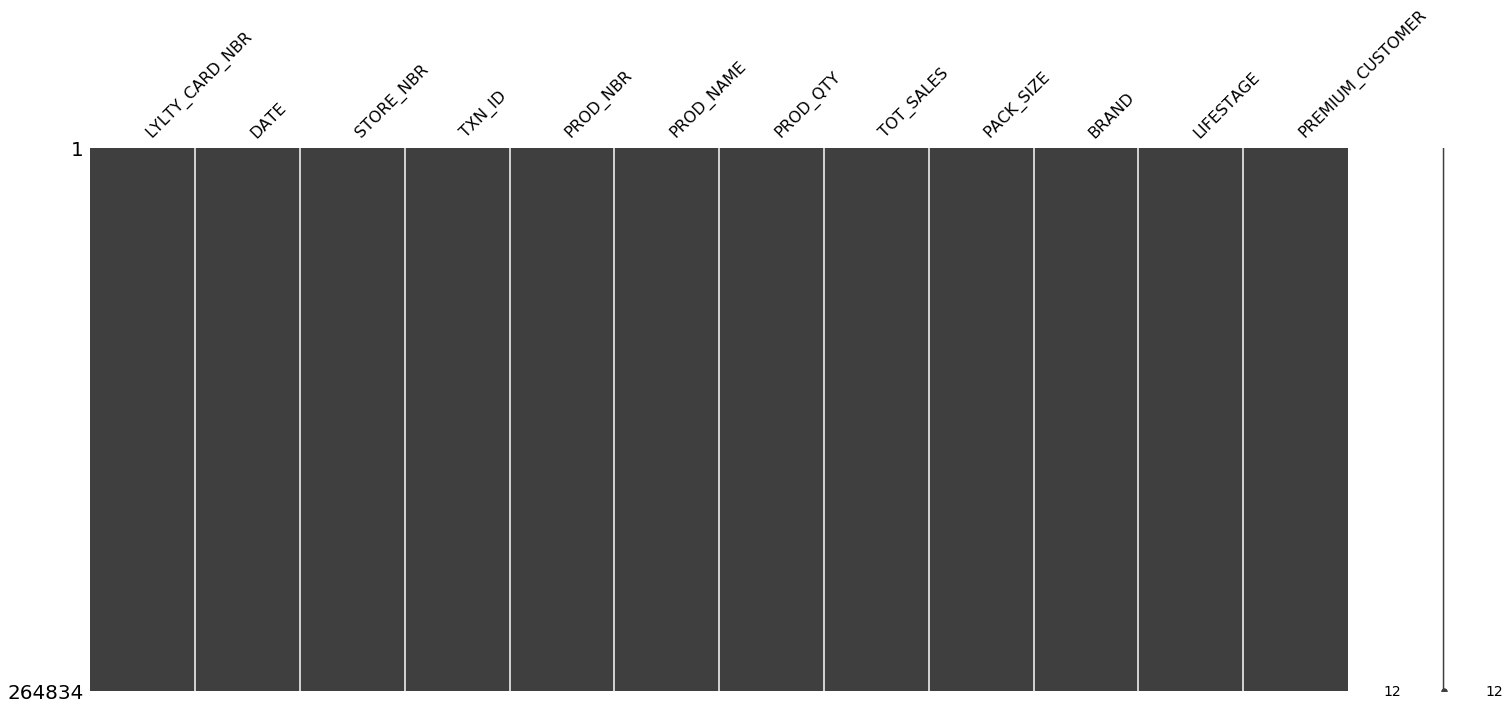

In [9]:
#Checking for null values
missingno.matrix(data)

# Control stores

In [14]:
data['YEARMONTH'] = [''.join(x.split('-')[0:2]) for x in data.DATE]
data['YEARMONTH'] = pd.to_numeric(data['YEARMONTH'])
data['YEARMONTH'].head()

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEARMONTH, dtype: int64

In [15]:
#Total sales for each store (monthly)

totalSales = data.groupby(['STORE_NBR', 'YEARMONTH']).TOT_SALES.sum()
totalSales

STORE_NBR  YEARMONTH
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
                        ...  
272        201902       395.5
           201903       442.3
           201904       445.1
           201905       314.6
           201906       312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [16]:
#Number of customers for each store (monthly)

nCustomers = data.groupby(['STORE_NBR', 'YEARMONTH']).LYLTY_CARD_NBR.nunique()
nCustomers

STORE_NBR  YEARMONTH
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [17]:
#Number of transactions per customer for each store (monthly)

nTxnPerCust = data.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.nunique() / data.groupby(['STORE_NBR', 'YEARMONTH']).LYLTY_CARD_NBR.nunique()
nTxnPerCust

STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
                          ...   
272        201902       1.066667
           201903       1.060000
           201904       1.018519
           201905       1.176471
           201906       1.088235
Length: 3169, dtype: float64

In [18]:
# Number of chips per transaction for each store (monthly)

nChipsPerTxn = data.groupby(['STORE_NBR', 'YEARMONTH']).PROD_QTY.sum() / data.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.nunique()
nChipsPerTxn

STORE_NBR  YEARMONTH
1          201807       1.192308
           201808       1.255814
           201809       1.209677
           201810       1.288889
           201811       1.212766
                          ...   
272        201902       1.895833
           201903       1.905660
           201904       1.909091
           201905       1.775000
           201906       1.891892
Length: 3169, dtype: float64

In [23]:
#  Monthly store average price per unit

avgPricePerUnit = data.groupby(['STORE_NBR', 'YEARMONTH']).TOT_SALES.sum() / data.groupby (['STORE_NBR', 'YEARMONTH']).PROD_QTY.sum()
avgPricePerUnit

STORE_NBR  YEARMONTH
1          201807       3.337097
           201808       3.261111
           201809       3.717333
           201810       3.243103
           201811       3.378947
                          ...   
272        201902       4.346154
           201903       4.379208
           201904       4.239048
           201905       4.430986
           201906       4.458571
Length: 3169, dtype: float64

In [25]:
df = [totalSales, nCustomers, nTxnPerCust, nChipsPerTxn, avgPricePerUnit]
measureOverTime = pd.concat(df, join = 'outer', axis = 1)
measureOverTime.head()

TOT_SALES  LYLTY_CARD_NBR         0         1         2
STORE_NBR YEARMONTH                                                         
1         201807         206.9              49  1.061224  1.192308  3.337097
          201808         176.1              42  1.023810  1.255814  3.261111
          201809         278.8              59  1.050847  1.209677  3.717333
          201810         188.1              44  1.022727  1.288889  3.243103
          201811         192.6              46  1.021739  1.212766  3.378947

In [26]:
measureOverTime.rename(columns = {'TOT_SALES':'totSales', 'LYLTY_CARD_NBR':'nCustomers', 0:'nChipsPerCust', 1:'nChipsPerTxn', 2:'avgPricePerUnit'}, inplace = True)
measureOverTime.head(4)

totSales  nCustomers  nChipsPerCust  nChipsPerTxn  \
STORE_NBR YEARMONTH                                                      
1         201807        206.9          49       1.061224      1.192308   
          201808        176.1          42       1.023810      1.255814   
          201809        278.8          59       1.050847      1.209677   
          201810        188.1          44       1.022727      1.288889   

                     avgPricePerUnit  
STORE_NBR YEARMONTH                   
1         201807            3.337097  
          201808            3.261111  
          201809            3.717333  
          201810            3.243103

In [27]:
a =  pd.pivot_table(data, index='STORE_NBR', columns='YEARMONTH', values='TXN_ID', aggfunc = 'count')
a

YEARMONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [28]:
a.isnull().sum()

YEARMONTH
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

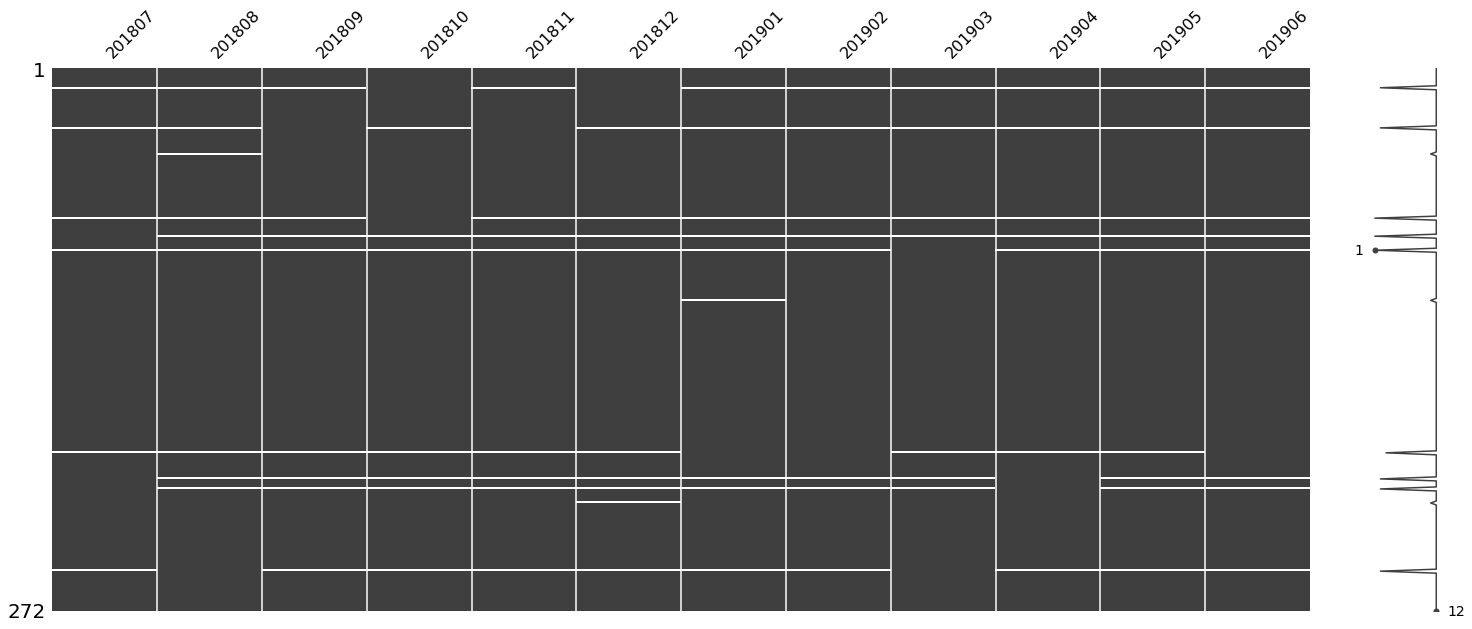

In [29]:
#Visualizing the null values

missingno.matrix(a)

In [31]:
null_store = a[a.isnull().any(axis=1)].index.tolist()
print(null_store)

len(null_store)

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]


12

In [32]:
measureOverTime.reset_index(inplace = True)
measureOverTime.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [33]:

# Drop 'null_store' from 'measureOverTime' dataframe

measureOverTime = measureOverTime[~measureOverTime['STORE_NBR'].isin(null_store)]
len(measureOverTime)

3120

In [34]:
preTrialMeasures = measureOverTime.loc[measureOverTime['YEARMONTH'] < 201902, :]
len(preTrialMeasures)

1820

In [35]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
